# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset. It's meant to be an instructional example, through which you can understand the underlying math of neural networks better.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [3]:
Y_train

array([4, 9, 8, ..., 3, 4, 9])

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 7 5 ... 6 5 0] [4 9 8 ... 3 4 9]
0.14658536585365853
Iteration:  10
[1 7 9 ... 8 6 0] [4 9 8 ... 3 4 9]
0.21790243902439024
Iteration:  20
[9 7 9 ... 8 6 0] [4 9 8 ... 3 4 9]
0.28043902439024393
Iteration:  30
[9 7 9 ... 8 6 0] [4 9 8 ... 3 4 9]
0.3445121951219512
Iteration:  40
[9 7 9 ... 3 6 0] [4 9 8 ... 3 4 9]
0.4089512195121951
Iteration:  50
[4 7 9 ... 3 6 0] [4 9 8 ... 3 4 9]
0.469390243902439
Iteration:  60
[4 7 9 ... 3 5 0] [4 9 8 ... 3 4 9]
0.5241463414634147
Iteration:  70
[4 7 9 ... 3 9 0] [4 9 8 ... 3 4 9]
0.5688536585365853
Iteration:  80
[4 7 9 ... 3 9 0] [4 9 8 ... 3 4 9]
0.6044634146341463
Iteration:  90
[4 7 9 ... 3 9 0] [4 9 8 ... 3 4 9]
0.634219512195122
Iteration:  100
[4 7 8 ... 3 9 0] [4 9 8 ... 3 4 9]
0.6591219512195122
Iteration:  110
[4 7 8 ... 3 9 0] [4 9 8 ... 3 4 9]
0.6801951219512196
Iteration:  120
[4 7 8 ... 3 9 0] [4 9 8 ... 3 4 9]
0.6980487804878048
Iteration:  130
[4 7 8 ... 3 9 5] [4 9 8 ... 3 4 9]
0.7123414634146341
Iteration:  140


~85% accuracy on training set.

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [4]
Label:  4


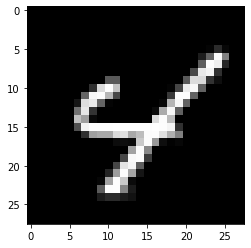

Prediction:  [7]
Label:  9


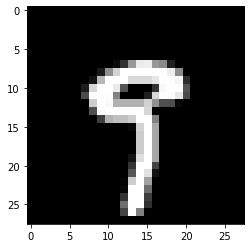

Prediction:  [8]
Label:  8


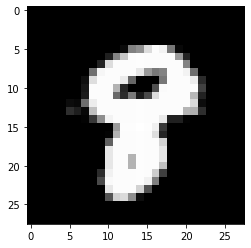

Prediction:  [3]
Label:  3


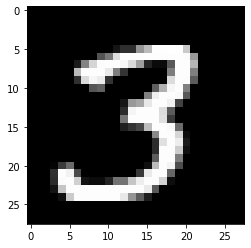

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 5 7 1 4 5 3 1 2 8 0 2 1 4 1 5 3 9 0 5 0 5 8 0 0 0 3 2 0 1 3 5 6 2 8 4 5
 7 5 8 9 9 1 3 8 9 7 7 2 7 5 4 3 0 3 0 9 2 9 6 3 4 1 0 4 4 9 2 2 1 4 4 1 6
 6 2 7 9 4 0 9 6 2 5 1 3 8 8 4 6 5 9 9 7 9 4 8 2 2 0 6 2 7 6 9 5 0 5 9 7 3
 1 5 1 7 2 4 9 8 0 8 1 4 8 3 7 0 7 6 2 2 4 1 4 4 3 1 5 9 1 2 5 2 2 6 3 2 6
 2 0 0 0 3 1 5 6 6 7 1 4 1 8 5 9 0 0 0 7 1 7 3 0 2 1 3 5 2 3 9 3 4 5 0 8 7
 5 8 1 2 0 6 0 6 6 6 7 9 4 9 2 4 0 0 5 0 9 7 1 2 5 1 2 7 2 6 3 1 2 9 3 1 9
 3 3 8 5 9 9 7 0 6 4 7 3 3 0 8 0 6 4 0 2 3 0 3 1 0 0 0 8 0 2 1 7 4 8 6 7 4
 4 0 0 1 6 4 0 1 5 7 0 9 8 1 6 4 6 2 4 0 6 4 8 1 2 4 3 1 0 1 9 1 1 3 1 9 8
 3 0 3 9 8 7 5 0 0 1 4 3 8 7 3 7 1 1 0 4 7 1 9 1 9 9 8 4 4 4 2 3 4 7 2 0 2
 4 3 3 2 7 5 8 1 7 6 0 3 4 9 3 6 4 9 5 4 7 3 3 7 8 8 9 6 3 3 0 5 9 8 4 2 0
 1 7 0 7 3 9 4 3 8 2 3 3 2 4 6 3 8 7 5 6 4 1 4 2 0 7 0 1 7 6 3 3 5 8 6 1 8
 5 4 3 7 7 5 3 1 5 9 4 1 3 6 9 4 4 6 8 0 9 1 4 3 4 1 9 4 1 5 3 5 0 4 4 1 0
 4 7 9 2 3 7 9 2 9 4 0 6 9 1 4 5 2 9 7 2 6 6 9 2 8 2 2 9 9 7 8 6 6 2 3 6 8
 8 0 0 4 2 9 2 9 4 7 8 9 

0.847

Still 84% accuracy, so our model generalized from the training data pretty well.